# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [4]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
# Your work here.

In [ ]:
# Questions 1 and 2

In [6]:
import matplotlib.pyplot as plt
import numpy as np

11.401754251


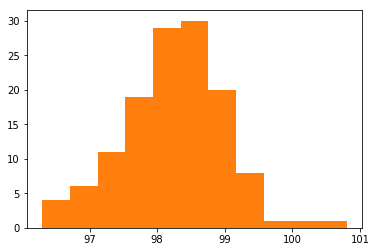

In [15]:
data_len = len(df['temperature'])
n_bins = np.sqrt(data_len)
plt.hist(df['temperature'], bins=int(n_bins))
plt.show()

In [34]:
temp = df['temperature']
mean = np.mean(temp)
std = np.std(temp)

In [23]:
samples = np.random.normal(mean, std, 10000)

In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [28]:
x_theoretical, y_theoretical = ecdf(samples)
x_actual, y_actual = ecdf(temp)

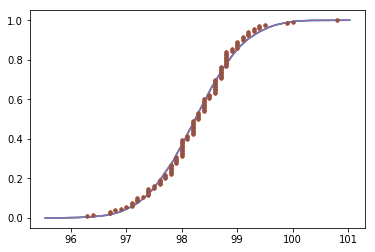

In [32]:
plt.plot(x_theoretical, y_theoretical)
plt.plot(x_actual, y_actual, marker='.', linestyle='none')
plt.show()
"""Looking at the ecdf of a sample of 10,000 occurences of the data, overlaid with the 
actual data - I would say this is a normal distribution.
In answer to question number 2, according to Investopedia, you strive for sample sizes
of 30 or more, which we do exceed."""

In [ ]:
# Question 3

In [36]:
print(mean)
print(std)

98.2492307692
0.730357778905


In [ ]:
# Because we do not know the standard deviation of the population it is better for us to use the t-score

In [39]:
# t = (sample mean - population mean) / (sample std / square root of sample size)
diff_means = mean - 98.6
bottom = std / np.sqrt(len(temp))
t = diff_means/bottom
t

-5.4759252020785585

In [ ]:
# z = (x-u)/sigma/sgrt(n) or (sample mean - population mean) / (population std / square root of sample size)
# However, we don't have a population std...so we cannot calculate the z

In [ ]:
# Question 4

In [46]:
# A 95% confidence interval, also known as 2 standrd deviations is known as the "normal range" for a normal distribution
two_std = np.percentile(temp, [2.5, 97.5])

array([ 96.7225,  99.4775])

In [ ]:
# Question 5

In [59]:
m = df[df['gender']==('M')]
f = df[df['gender']==('F')]
temp_m = m['temperature']
temp_f = f['temperature']

In [60]:
x_m, y_m = ecfd(temp_m)
x_f, y_f = ecfd(temp_f)

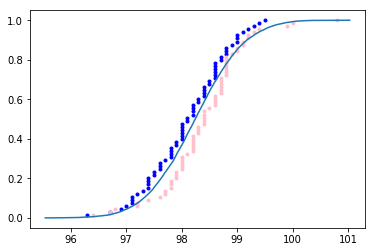

In [61]:
plt.plot(x_m, y_m, marker='.', linestyle = 'none', color='blue')
plt.plot(x_f, y_f, marker='.', linestyle='none', color='pink')
plt.plot(x_theoretical, y_theoretical)
plt.show()

In [66]:
two_std_m = np.percentile(temp_m, [2.5, 97.5])
two_std = np.percentile(temp, [2.5, 97.5])
two_std_f = np.percentile(temp_f, [2.5, 97.5])
print(two_std_m)
print(two_std)
print(two_std_f)
print(np.mean(temp_m))
print(np.mean(temp))
print(np.mean(temp_f))

[ 96.82  99.34]
[ 96.7225  99.4775]
[ 96.76  99.94]
98.1046153846
98.2492307692
98.3938461538


In [ ]:
"""There seems to be a degree of significant statistical difference between male and female body temperatures.
The above ecdf shows the normal distributions of both male and female body temperatures over top of a normal distribution.
The female body tempurature tends to be higher than the male body temperature for the average person. This is shown
through both confidence intervals and the mean of the data as shown above. Further proof could take the form of bootstrapping
the male and female data."""